<h1 align=center>Most Streamed Spotify Songs 2023</h1>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import chardet

with open('./spotify-2023.csv', 'rb') as f:
    result = chardet.detect(f.read())
    encoding = result['encoding']

data = pd.read_csv('./spotify-2023.csv', encoding=encoding)
data = data.drop(574)
'''
в 574 строке ошибка в количествах прослушиваний
'''

'\nв 574 строке ошибка в количествах прослушиваний\n'

In [4]:
data.sort_values(by='streams', ascending=False )

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
33,Anti-Hero,Taylor Swift,1,2022,10,21,9082,56,999748277,242,...,97,E,Major,64,51,63,12,0,19,5
625,Arcade,Duncan Laurence,1,2019,3,7,6646,0,991336132,107,...,72,A,Minor,45,27,33,82,0,14,4
253,Glimpse of Us,Joji,1,2022,6,10,6330,6,988515741,109,...,170,G#,Major,44,27,32,89,0,14,5
455,Seek & Destroy,SZA,1,2022,12,9,1007,0,98709329,5,...,152,C#,Major,65,35,65,44,18,21,7
98,Summertime Sadness,Lana Del Rey,1,2011,1,1,20333,52,983637508,89,...,112,C#,Minor,56,24,66,7,0,12,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,Revenge,XXXTENTACION,1,2017,8,25,3600,11,1022258230,7,...,140,B,Minor,75,18,25,78,0,11,26
744,Right On,Lil Baby,1,2022,4,8,1116,0,101780047,31,...,166,D,Major,70,22,61,2,0,10,34
515,Best Friends,The Weeknd,1,2022,1,7,1292,0,101114984,3,...,87,E,Minor,49,49,59,44,0,35,21
500,ýýýabcdefu,Gayle,1,2021,8,13,7215,0,1007612429,170,...,122,E,Major,70,42,54,30,0,37,5


<h1 align=center>Задание 2.</h1>
<p>
Описать кратко постановку задачи, что от вас хотят. Какие есть переменные. Целевое событие непрерывно (предсказываем число от -inf 
 до +inf
) либо дискретно (предсказываем класс из конечного множества вариантов, например 0 или 1, или какое-то число в диапазоне [0; 10])
</p>

<h1>Постановка задачи</h1>
<p>Полагаю, что самаое очевидное, что напрашивается с данным датасетом – предсказание количества прослушиваний. Как следствие предсказания глобального топа рейтинга. Также предсказание количества плейлистов в которые разные официальные площадки его добваили.</p>
<ul>
<li>track_name: Name of the song</li>

Название трека. Не переменная.

<li>artist(s)_name: Name of the artist(s) of the song</li>

Имя Артиста. Категориальная переменная. Уникальных артистов 644.

<li>artist_count: Number of artists contributing to the song</li>

Количество артистов на фите. То есть количество исполнителей вместе с автором. [1, inf] дискретно step=1

<li>released_year: Year when the song was released</li>

Год релиза. Дискретный [1930, 2023]

<li>released_month: Month when the song was released</li>

Месяц релиза. Дискретный [1, 12]

<li>released_day: Day of the month when the song was released</li>

Месяц релиза. Дискретный [1, 31].

<li>in_spotify_playlists: Number of Spotify playlists the song is included in</li>

Количество плейлистов в которые включен данный трек в Spotify. Дискретная величина. Может быть целевой переменной

<li>in_spotify_charts: Presence and rank of the song on Spotify charts</li>

Топ чарты в Spotify. Дискретная величина. Может быть целевой переменной

<li>streams: Total number of streams on Spotify</li>

Количество прослушиваний в Spotify. Дискретная. Может быть целевой переменной

<li>in_apple_playlists: Number of Apple Music playlists the song is included in</li>

Количество плейлистов в которые включен данный трек в AppleMusic. Дискретная величина. Может быть целевой переменной

<li>in_apple_charts: Presence and rank of the song on Apple Music charts</li>

Присутствие в чартах Apple Music. [0; 275]. 0- отсутствует. >1 место 

<li>in_deezer_playlists: Number of Deezer playlists the song is included in</li>

Количество плейлистов в которые включен данный трек в Deezer. Дискретная величина. Может быть целевой переменной

<li>in_deezer_charts: Presence and rank of the song on Deezer charts</li>

Присутствие в чартах Deezer. [0; 58]. 0- отсутствует. >1 место. Дискретная

<li>in_shazam_charts: Presence and rank of the song on Shazam charts</li>

Присутствие в чартах Shazam. [0; 99]. 0- отсутствует. >1 место . Дискретная

<li>bpm: Beats per minute, a measure of song tempo</li>

BPM [65,205] дискретная

<li>key: Key of the song</li>

Тональность. 11 тональностей. Категориальная переменная. 

<li>mode: Mode of the song (major or minor)</li>

Без понятия если честно

<li>danceability_%: Percentage indicating how suitable the song is for dancing</li>

Насколько песня пригодна для танцев в процентах. [0,100]

<li>valence_%: Positivity of the song's musical content</li>

Валентность? 

<li>energy_%: Perceived energy level of the song</li>

Энергичность песни в процентах. [0,100]

<li>acousticness_%: Amount of acoustic sound in the song</li>

Процент акустичности в процентах. [0,100]

<li>instrumentalness_%: Amount of instrumental content in the song</li>

Доля инструментального исполнения в процентах. [0,100]

<li>liveness_%: Presence of live performance elements</li>

Доля живого исполнения в процентах. [0,100]

<li>speechiness_%: Amount of spoken words in the song</li>

Доля текста в песне в процентах. [0,100]

</ul>

<h1>Мною было принято за целевую переменную взять streams - общее число прослушиваний.</h1>




<h1 align=center>Задание 3.</h1>
<p>
Построить распределение целевой переменной в виде гистограммы, сделать промежуточные выводы (обратите внимание на однородоность распределения и возможный дисбаланс). Посчитайте количество уникальных значений целевой переменной.
</p>

In [5]:
print('Кол-во уникальных ', data['streams'].nunique())

Кол-во уникальных  948


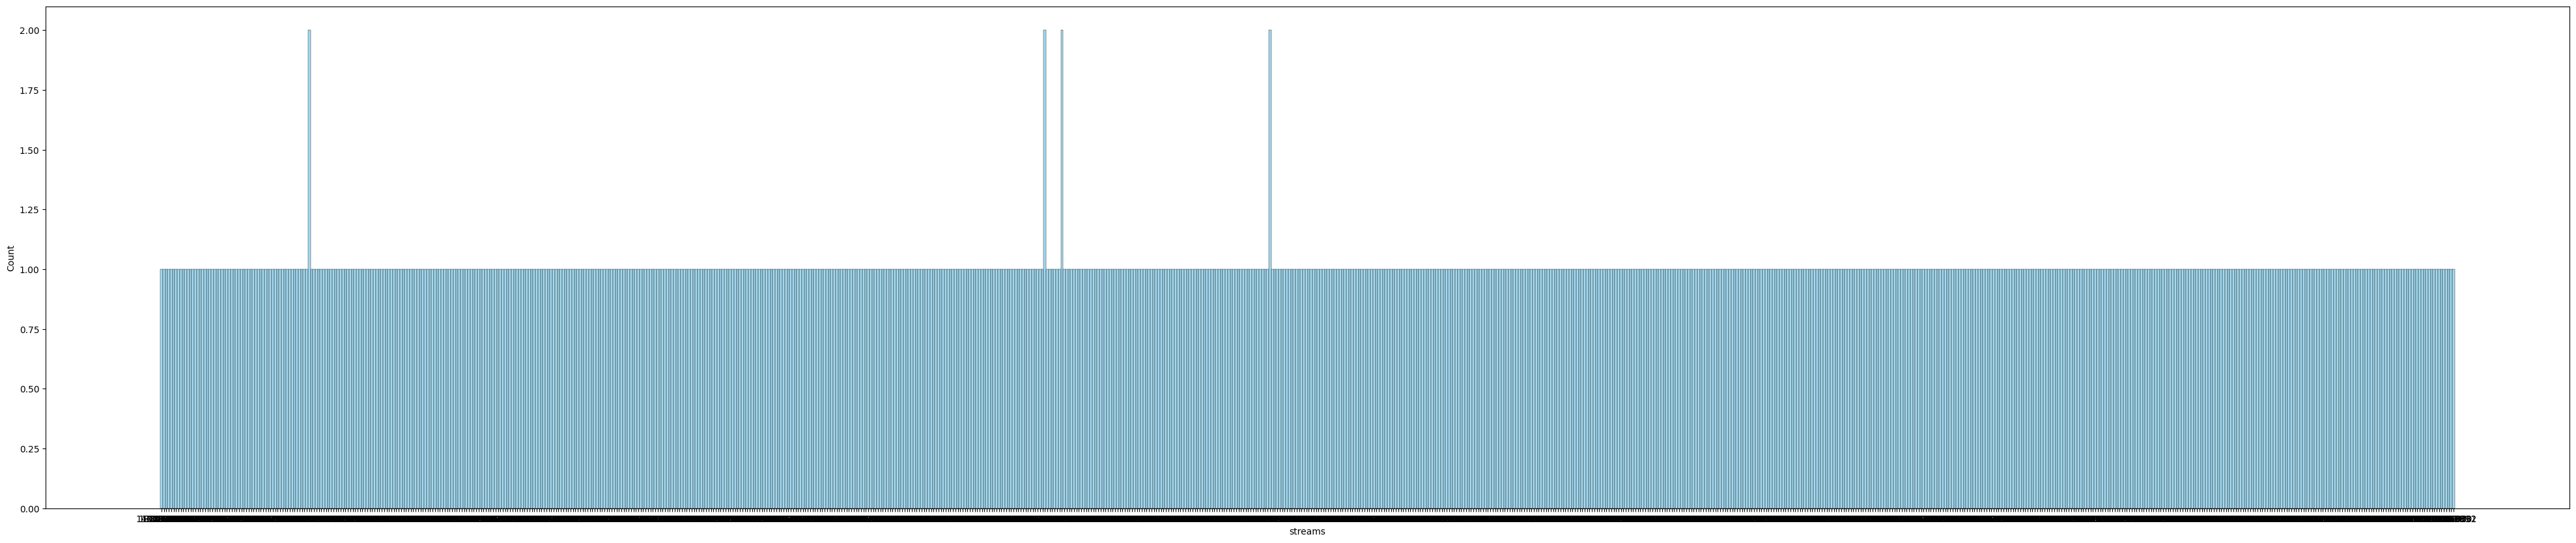

'\nДостаточно строить гистограмму переменной количества прослушиваний. Как можно заметить, у нескольких песен совпало количество прослушиваний.\n'

In [6]:
plt.figure(figsize=(50,10))
sns.histplot(data =data, x='streams', bins='auto',color='skyblue',)
plt.show();
'''
Достаточно строить гистограмму переменной количества прослушиваний. Как можно заметить, у нескольких песен совпало количество прослушиваний.
'''

<h1 align=center>Задание 5.</h1>
<p>
Выведите основные статистики по переменным в датасете (для этого есть готовый метод в pandas, он считает count, min, max, mean, 25%, 50% и пр.). Это делается одним методом (вы его знаете).
</p>

In [7]:
data.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000
mean,1.556723,2018.288866,6.038866,13.944328,5202.565126,12.022059,67.866597,51.963235,2.669118,122.553571,66.984244,51.406513,64.274160,27.078782,1.582983,18.214286,10.138655
std,0.893331,11.011397,3.564571,9.197223,7901.400683,19.582405,86.470591,50.628850,6.038152,28.069601,14.631282,23.480526,16.558517,26.001599,8.414064,13.718374,9.915399
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.000000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,874.500000,0.000000,13.000000,7.000000,0.000000,99.750000,57.000000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2216.500000,3.000000,34.000000,38.500000,0.000000,121.000000,69.000000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5573.750000,16.000000,88.000000,87.000000,2.000000,140.250000,78.000000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.000000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


<h1 align=center>Задание 6.</h1>
<p>
Посчитайте количество пропусков (NaN, Null, null, None) элементов во всех колонках. Предположите, почему эти пропуски могли возникнуть, и как их можно было бы заменить.
</p>

In [8]:
print(data.isna().sum())

nan_cols = [i for i in data.columns if data[i].isnull().any()]
print(nan_cols)

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64
['in_shazam_charts', 'key']


По идее можно просто дропнуть колонку key, поскольку она не очень нужна при анализе. 
А вот in_shazam_charts скорее всего понадобится при анализе. Поэтому можно сделать dropnа(). Их всего 50 штук. Не так много.
key содержит nan скорее всего из-за того, что автор не указывал ее тональность при загрузке, либо это определялось автоматически

<h1 align=center>Задание 7  .</h1>
<p>
Постройте гистограммы 5 любых признаков (из множества X, или как оно изначально у нас называется data.data). Если видите какое-то смещение, несимметричность и прочее, опишите это словами в ноутбуке.
</p>

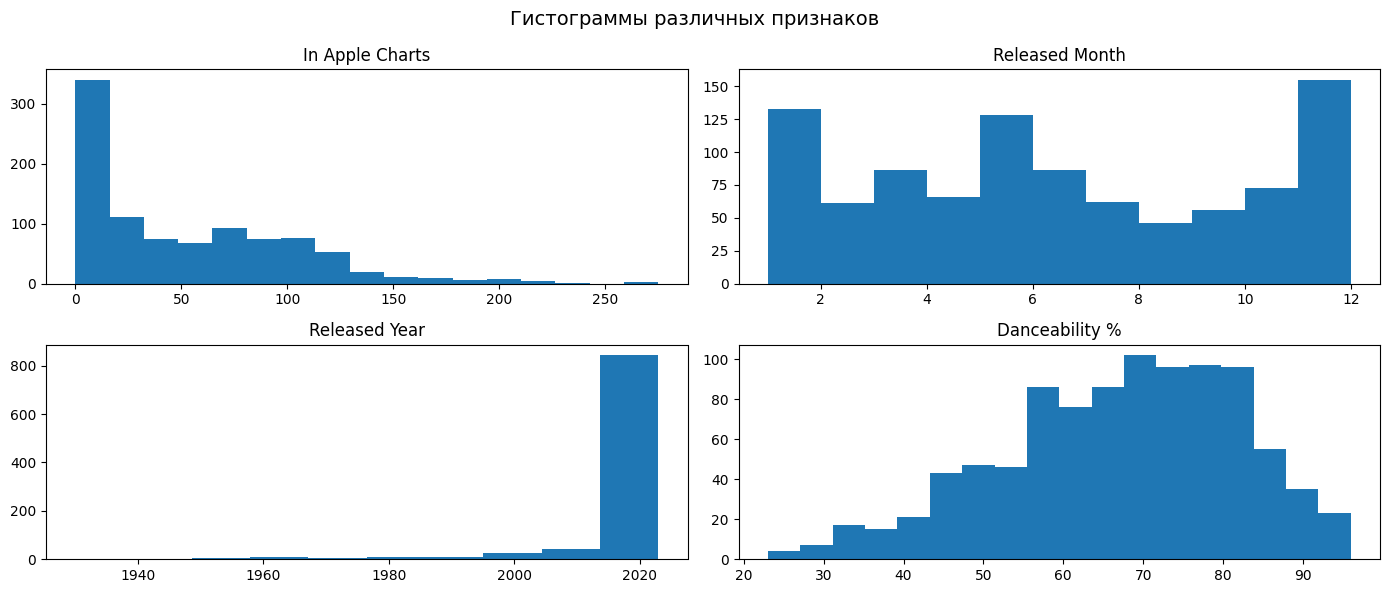

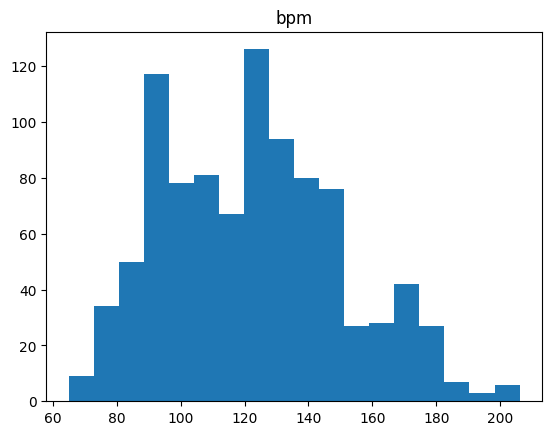

In [9]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(14, 6))
axs[0, 0].hist(data['in_apple_charts'], bins='auto', )
axs[0, 0].set_title('In Apple Charts')

axs[0, 1].hist(data['released_month'], bins='auto', )
axs[0, 1].set_title('Released Month')

axs[1, 0].hist(data['released_year'] )
axs[1, 0].set_title('Released Year')

axs[1, 1].hist(data['danceability_%'], bins='auto', )
axs[1, 1].set_title('Danceability %')

fig.suptitle('Гистограммы различных признаков', fontsize=14)

plt.tight_layout()

# Показать графики
plt.show()

plt.hist(data['bpm'], bins='auto')
plt.title('bpm')
plt.show()


Можно заметить, что некоторые величины распределены нормально. Так, например у переменной danceability заметна явная ассиметрия в правую сторону. 

<h1 align=center>Задание 7  .</h1>
<p>
Постройте графики зависимости 5 любых (на ваш выбор) переменных от целевой переменной (если переменных меньше, чем 5, то сделайте столько, сколько получится). Сделайте вывод, можно ли использовать эти переменные для прогнозирования целевой переменной (иначе говоря, есть ли какая-то взаимосвязь между y-переменной и X-переменной)
</p>

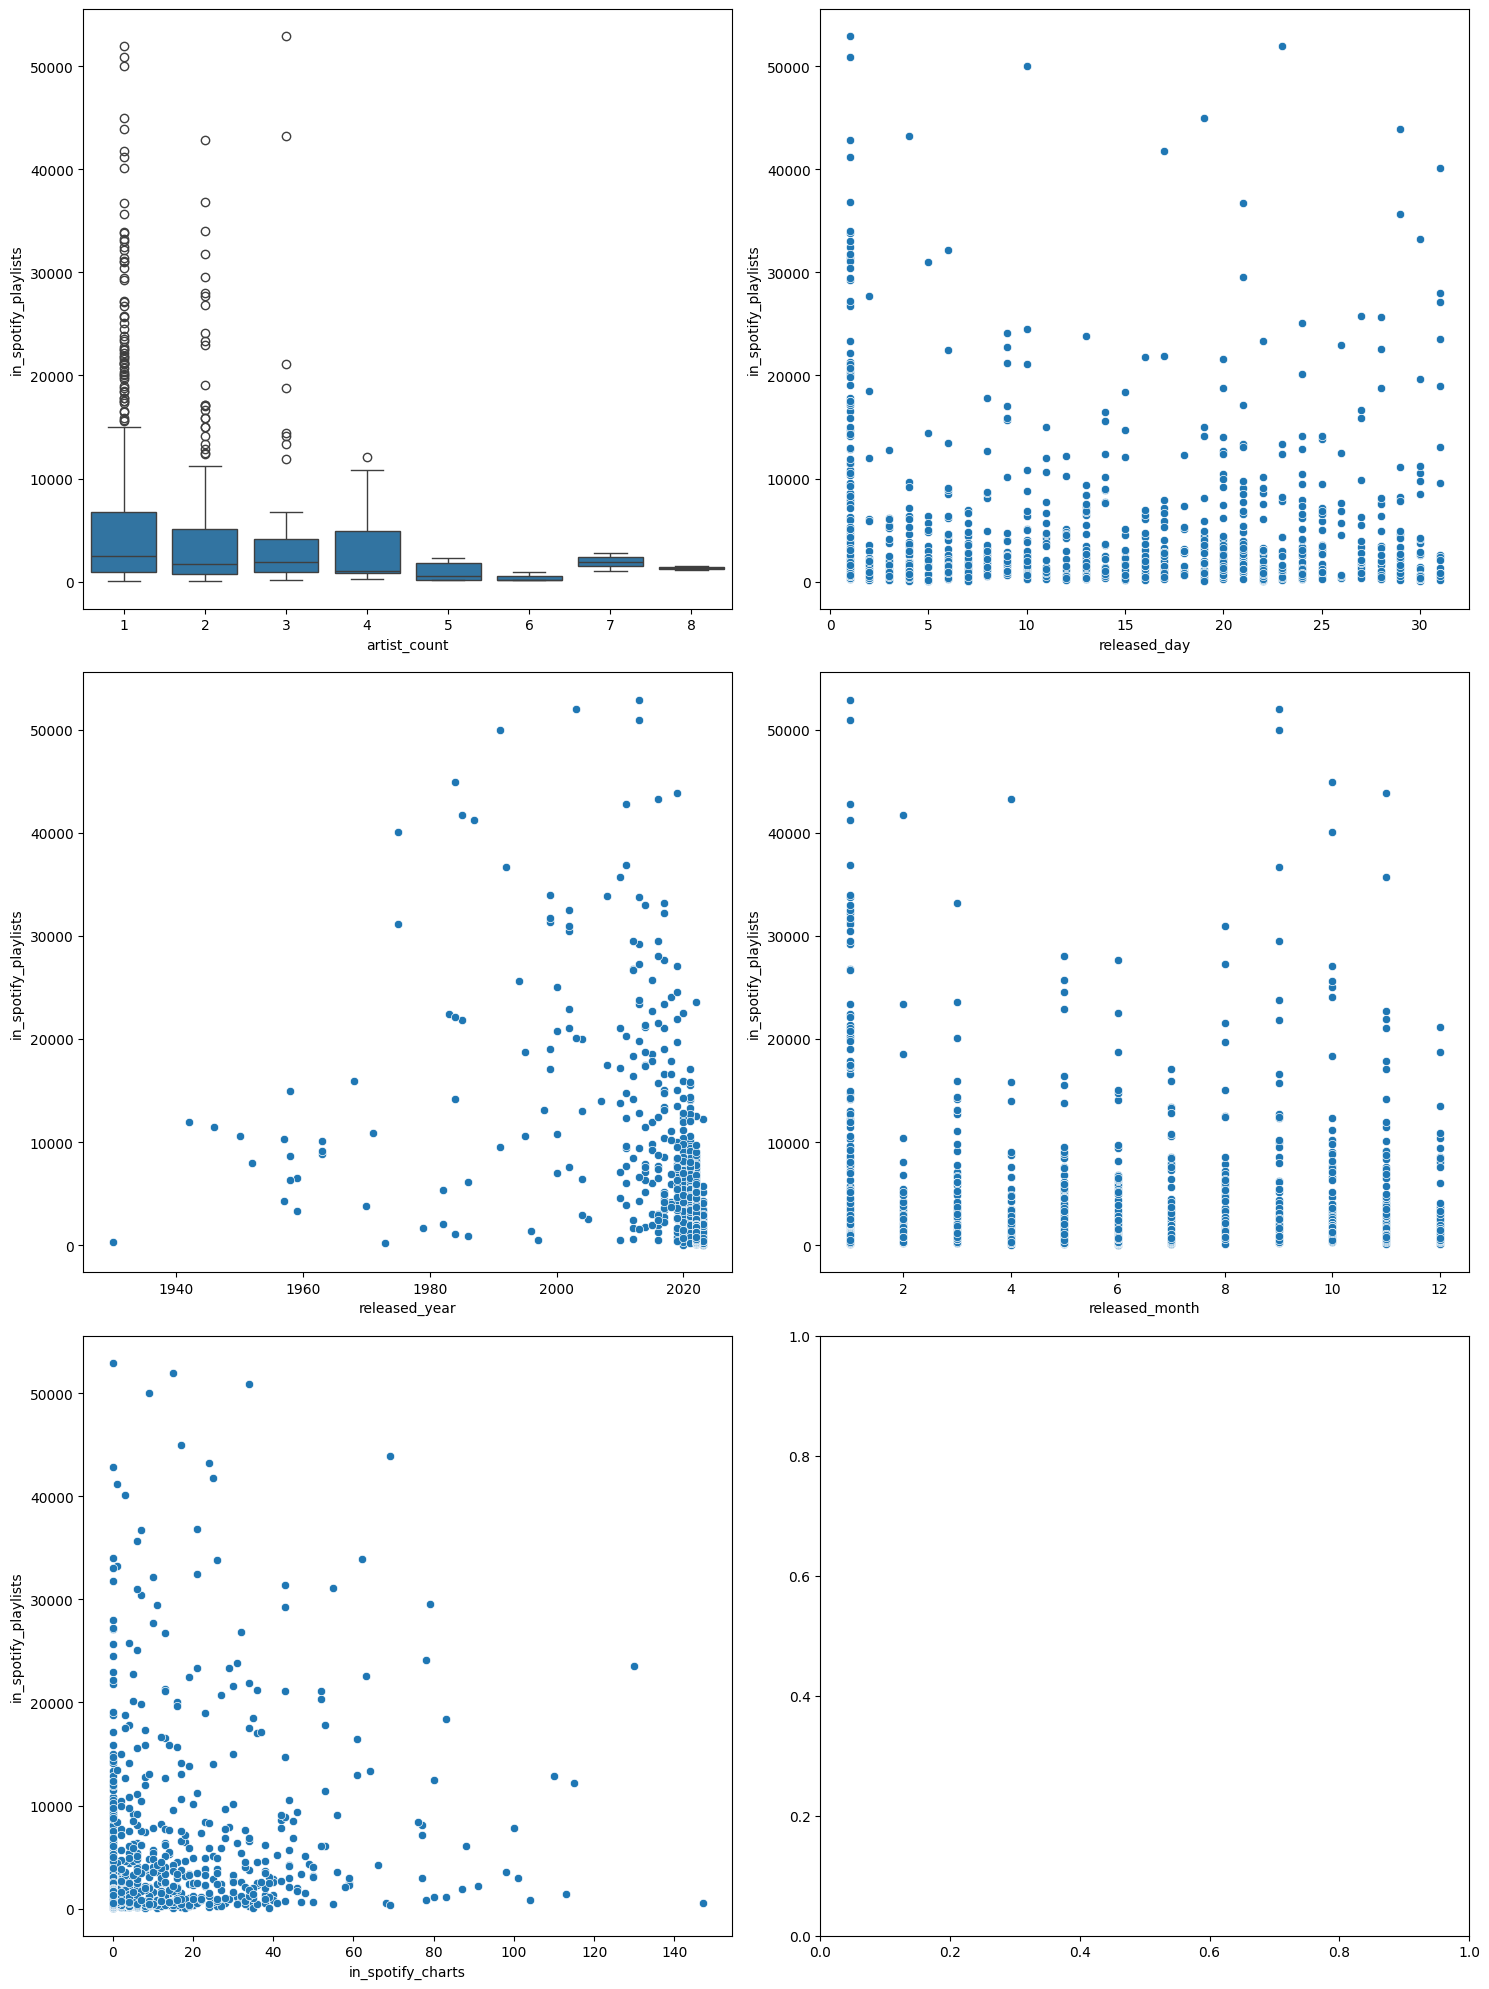

In [12]:

fig, axes = plt.subplots(3, 2, figsize=(15, 20))  
sns.boxplot(x=data['artist_count'], y=data['in_spotify_playlists'], ax=axes[0,0])

sns.scatterplot(x=data['released_year'], y=data['in_spotify_playlists'], ax=axes[1,0])

sns.scatterplot(x=data['in_spotify_charts'], y=data['in_spotify_playlists'],  ax=axes[2,0])

sns.scatterplot(x=data['released_day'], y=data['in_spotify_playlists'], ax=axes[0,1])
sns.scatterplot(x=data['released_month'], y=data['in_spotify_playlists'], ax=axes[1,1])

plt.tight_layout()  # Распределение между графиками
plt.show()


plt.show()


Можно заметить, что популярность песни в спотифай зависит от того, сколько артистов в песне. Как минимум можно сразу сказать, что чем больше артистов, тем реже песни попадают в плейлисты. Также чем выше песня в чарте спотифай, тем с большей вероятностью она окажется в плейлисте. Также можно заметить, что песни вышедние вначале месяца также преобладают в плейлистах.  Также заметно, что песни вышедшие в январе значительно популярнее
